In [121]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import random


Here i am loading the graph from the file where Ist value is parent node and 2nd node is child node.

In [122]:
def gph(file_path):
    edges = []
    nodes = set()
    
    with open(file_path, 'r') as file:
        for i in file:
            x = i.strip().split()
            if len(x) < 2:
                continue  
            node_u = int(x[0])
            node_v = int(x[1])
            
            edges.append((node_u, node_v))
            nodes.add(node_u)
            nodes.add(node_v)
    
    return list(nodes), edges


path = "C:/Users/lenovo/Downloads/Facebook-like Social Network.txt"
nodes, edges = gph(path)


Here i am computing both in degree and out degree beacuse we need it to plot the original graph and i have plotted the original graph for a node by adding in degree and out degree that is total degree for that node.

In [123]:
def compute_degrees(edges, nodes):
    in_deg = {}
    out_deg = {}
    
    for node in nodes:
        in_deg[node] = 0
        out_deg[node] = 0

    for u, v in edges:
        out_deg[u] += 1   
        in_deg[v] += 1   

    return in_deg, out_deg


def degree_distribution(edges, nodes):
    in_deg, out_deg = compute_degrees(edges, nodes)

    total_degrees = []
    for node in nodes:
        total = in_deg[node] + out_deg[node]
        total_degrees.append(total)
    degree_count = Counter(total_degrees)
    print(degree_count)
    print(len(degree_count))

    return dict(degree_count)


In [124]:
original_dist = degree_distribution(edges, nodes)


Counter({1: 335, 2: 192, 3: 122, 4: 97, 5: 87, 7: 59, 6: 54, 8: 50, 9: 42, 11: 39, 10: 38, 16: 27, 13: 27, 15: 26, 12: 26, 18: 25, 17: 25, 21: 25, 19: 23, 14: 21, 23: 21, 24: 20, 20: 18, 33: 17, 31: 17, 26: 16, 22: 16, 28: 15, 27: 15, 32: 14, 30: 14, 35: 13, 29: 12, 38: 12, 25: 11, 34: 11, 53: 9, 51: 9, 36: 9, 43: 8, 66: 8, 48: 8, 37: 8, 58: 7, 94: 7, 46: 7, 67: 7, 50: 7, 39: 7, 59: 6, 55: 6, 41: 6, 42: 6, 54: 6, 88: 5, 77: 5, 63: 5, 45: 5, 56: 5, 62: 5, 60: 5, 83: 4, 76: 4, 80: 4, 47: 4, 64: 4, 49: 4, 52: 4, 132: 3, 102: 3, 92: 3, 79: 3, 138: 3, 44: 3, 103: 3, 68: 3, 72: 3, 78: 3, 73: 3, 61: 3, 90: 2, 111: 2, 309: 2, 137: 2, 160: 2, 236: 2, 136: 2, 86: 2, 81: 2, 106: 2, 96: 2, 40: 2, 153: 2, 110: 2, 98: 2, 82: 2, 118: 2, 104: 2, 75: 2, 114: 2, 74: 2, 57: 2, 216: 1, 290: 1, 174: 1, 319: 1, 233: 1, 280: 1, 208: 1, 134: 1, 85: 1, 339: 1, 265: 1, 95: 1, 123: 1, 146: 1, 71: 1, 87: 1, 165: 1, 175: 1, 116: 1, 84: 1, 109: 1, 135: 1, 105: 1, 91: 1, 93: 1, 70: 1, 65: 1, 192: 1, 121: 1, 256: 1, 

Here i am assigning stubs for in degree and out degree both.

In [125]:
def config_model(nodes, edges):
    in_deg, out_deg = compute_degrees(edges, nodes)

# Creating stubs for in degree
    in_stubs = []
    for node in nodes:
        for i in range(in_deg[node]):
            in_stubs.append(node)
    # print(in_stubs)
# Creating stubs for out degree
    out_stubs = []
    for node in nodes:
        for i in range(out_deg[node]):
            out_stubs.append(node)


    random.shuffle(in_stubs)
    random.shuffle(out_stubs)

    new_edges = []
    edge_set = set()
    attempts = 0
    max_attempts = len(nodes) * 20

    while in_stubs and out_stubs:
        src = out_stubs.pop()
        dst = in_stubs.pop()

        if src != dst and (src, dst) not in edge_set:
            new_edges.append((src, dst))
            edge_set.add((src, dst))
        else:
            attempts += 1
            if attempts > max_attempts:
                break
    return new_edges


Here i am doing the configuration randomnes for 100 iterations.

In [126]:
config_dists = []
for i in range(100):
    config_edges = config_model(nodes, edges)
    print("Sample edges from one randomized graph:", config_edges[:5])
    dist = degree_distribution(config_edges, nodes)
    config_dists.append(dist)
# print(len(config_dists))

Sample edges from one randomized graph: [(26, 884), (61, 101), (69, 1072), (415, 641), (124, 701)]
Counter({1: 335, 2: 192, 3: 122, 4: 97, 5: 88, 7: 59, 6: 56, 8: 49, 9: 44, 10: 37, 11: 37, 16: 29, 17: 28, 12: 28, 15: 26, 21: 26, 13: 25, 18: 24, 14: 23, 30: 22, 19: 20, 23: 20, 27: 20, 24: 19, 20: 18, 22: 18, 32: 17, 26: 14, 29: 14, 34: 14, 31: 13, 25: 13, 35: 12, 50: 12, 53: 11, 36: 11, 33: 10, 46: 9, 28: 8, 38: 8, 37: 8, 44: 7, 40: 7, 39: 7, 84: 6, 62: 6, 51: 6, 57: 6, 47: 6, 43: 6, 55: 6, 72: 5, 73: 5, 81: 5, 64: 5, 59: 5, 66: 5, 52: 5, 60: 5, 48: 5, 56: 4, 42: 4, 76: 4, 65: 4, 45: 4, 54: 4, 89: 4, 63: 4, 61: 4, 58: 4, 91: 3, 100: 3, 79: 3, 74: 3, 75: 3, 126: 3, 102: 3, 99: 3, 41: 3, 107: 3, 70: 3, 71: 3, 87: 2, 209: 2, 85: 2, 130: 2, 127: 2, 103: 2, 124: 2, 147: 2, 204: 2, 83: 2, 140: 2, 131: 2, 77: 2, 90: 2, 78: 2, 68: 2, 109: 2, 92: 2, 111: 2, 108: 2, 67: 2, 96: 2, 49: 2, 149: 2, 190: 1, 248: 1, 163: 1, 122: 1, 285: 1, 236: 1, 185: 1, 120: 1, 291: 1, 281: 1, 240: 1, 114: 1, 153: 1

And this code is for calcuating average degree distribution for 100 random graphs.

In [127]:
def average_degree_distributions(degree_dicts):
    all_degrees = set()
    for d in degree_dicts:
        all_degrees.update(d.keys())

    avg_dist = {}
    for deg in sorted(all_degrees):
        values = []
        for d in degree_dicts:
            if deg in d:
                values.append(d[deg])
    
        avg_dist[deg] = np.mean(values)

    return avg_dist


config_avg = average_degree_distributions(config_dists)


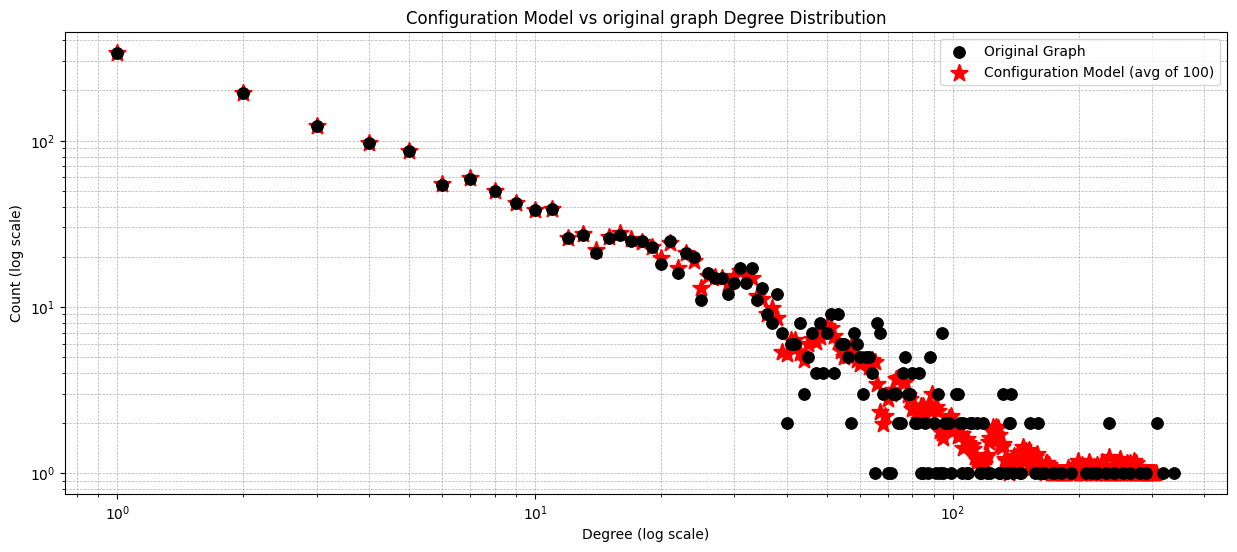

In [142]:
plt.figure(figsize=(15, 6))

plt.scatter(original_dist.keys(), original_dist.values(),
            label="Original Graph", color='black',
            s=70, edgecolors='black', linewidths=0.8, zorder=3)

plt.scatter(config_avg.keys(), config_avg.values(),
            label="Configuration Model (avg of 100)", color='red',
            marker='*', s=150, linewidths=1.5, zorder=2)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree (log scale)")
plt.ylabel("Count (log scale)")
plt.title("Configuration Model vs original graph Degree Distribution")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.savefig("configuration_model_vs_original.png", dpi=300)
plt.show()


Discussion for the configuration model = here we observe that the degree distribution of the generated random graph differs slightly from that of the real-world graph, even though we wanted to preserve the degree sequence. This happen because we assign stubs that is half edges to each node and attempt to randomly connect these stubs to form edges. but during this process if selected stub pair would form a self-loop that is  connect a node to itself or a duplicate edge taht is  an edge that already exists then we skip that connection. These skipped stubs are not reused later, which leads to a few stubs being wasted. As a result, some nodes especially those with higher degrees end up with fewer connections than they originally had, causing slight deviations in the degree distribution. Despite this, the overall pattern of the distribution remains similar to the original graph.

This the code for edge swapping randomness strategy here i am swapping edges randomly but here  the degree distribution remain same every time so the graph for real and random appears to be same but other properties like clustering coff changes.

In [130]:
def edge_swapping(edges, num_swaps):
    edge_list = edges[:]
    edge_set = set(edge_list)
    swaps = 0
    tries = 0
    max_tries = num_swaps * 20

    for i in range(max_tries):
        if swaps >= num_swaps:
            break

        e1, e2 = random.sample(edge_list, 2)
        u1, v1 = e1
        u2, v2 = e2

        if len({u1, v1, u2, v2}) < 4:
            tries += 1
            continue

        if (u1, v2) in edge_set or (u2, v1) in edge_set:
            tries += 1
            continue

        edge_list.remove(e1)
        edge_list.remove(e2)
        edge_list.append((u1, v2))
        edge_list.append((u2, v1))

        edge_set.remove(e1)
        edge_set.remove(e2)
        edge_set.add((u1, v2))
        edge_set.add((u2, v1))

        swaps += 1

    return edge_list


Doing the swapping code 100 times.

In [132]:
swaping_dists = []

for i in range(100):
    swapped_edges = edge_swapping(edges,20000)
    d= degree_distribution(swapped_edges, nodes)
    swaping_dists.append(d)


Counter({1: 335, 2: 192, 3: 122, 4: 97, 5: 87, 7: 59, 6: 54, 8: 50, 9: 42, 11: 39, 10: 38, 16: 27, 13: 27, 15: 26, 12: 26, 18: 25, 17: 25, 21: 25, 19: 23, 14: 21, 23: 21, 24: 20, 20: 18, 33: 17, 31: 17, 26: 16, 22: 16, 28: 15, 27: 15, 32: 14, 30: 14, 35: 13, 29: 12, 38: 12, 25: 11, 34: 11, 53: 9, 51: 9, 36: 9, 43: 8, 66: 8, 48: 8, 37: 8, 58: 7, 94: 7, 46: 7, 67: 7, 50: 7, 39: 7, 59: 6, 55: 6, 41: 6, 42: 6, 54: 6, 88: 5, 77: 5, 63: 5, 45: 5, 56: 5, 62: 5, 60: 5, 83: 4, 76: 4, 80: 4, 47: 4, 64: 4, 49: 4, 52: 4, 132: 3, 102: 3, 92: 3, 79: 3, 138: 3, 44: 3, 103: 3, 68: 3, 72: 3, 78: 3, 73: 3, 61: 3, 90: 2, 111: 2, 309: 2, 137: 2, 160: 2, 236: 2, 136: 2, 86: 2, 81: 2, 106: 2, 96: 2, 40: 2, 153: 2, 110: 2, 98: 2, 82: 2, 118: 2, 104: 2, 75: 2, 114: 2, 74: 2, 57: 2, 216: 1, 290: 1, 174: 1, 319: 1, 233: 1, 280: 1, 208: 1, 134: 1, 85: 1, 339: 1, 265: 1, 95: 1, 123: 1, 146: 1, 71: 1, 87: 1, 165: 1, 175: 1, 116: 1, 84: 1, 109: 1, 135: 1, 105: 1, 91: 1, 93: 1, 70: 1, 65: 1, 192: 1, 121: 1, 256: 1, 

In [133]:
swaping_avg = average_degree_distributions(swaping_dists)

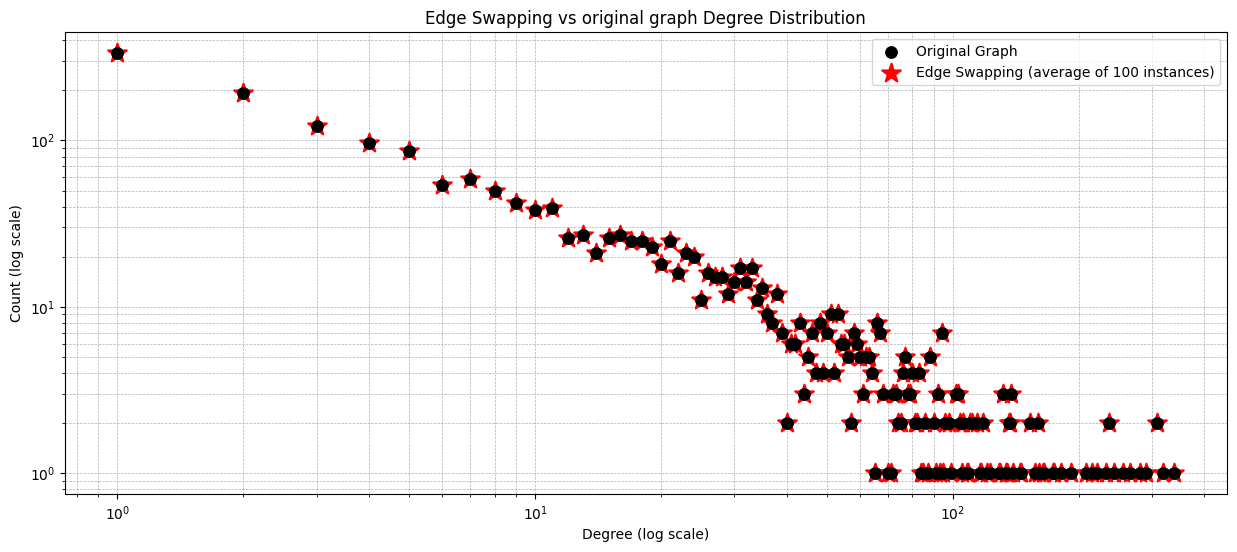

In [143]:
plt.figure(figsize=(15, 6))

plt.scatter(list(original_dist.keys()),list(original_dist.values()),
    label="Original Graph",color='black',s=70,
    edgecolors='black',linewidths=0.8,zorder=3
)

plt.scatter(list(swaping_avg.keys()),list(swaping_avg.values()),
    label="Edge Swapping (average of 100 instances)",
    color='red',marker='*',s=200,linewidths=1.5,zorder=2
)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree (log scale)")
plt.ylabel("Count (log scale)")
plt.title("Edge Swapping vs original graph Degree Distribution")
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.savefig("edge_swapping_vs_original.png", dpi=300)
plt.show()


Discussion for the swapping strategy = In this we observed that the degree distribution is exactly the same as the original graph.this happebns because the edge swapping strategy only rewires the edges while it keeps the in degree and outdegree for every mode exactly the same it just changes the end points that is which node is connected to which that is neighbours.No new edge is being added or removed here thats why the degree of every node remians exaclty the same as the real graph thats we get the exactly same degree distribution. During edge swapping some other structural properties gets changed like clustering coffiecent , shortest path , motifs etc.